<a href="https://colab.research.google.com/github/gauravpks/dl-repo/blob/master/RNN/StockMarket/StockPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [60]:
### Keras and Tensorflow >2.0

In [61]:
import tensorflow as tf
from tensorflow import keras

In [62]:
### Data Collection
import pandas_datareader as pdr
key="08941af7f104596f7055c25ae791348ca55978d4"

In [63]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [64]:
df.to_csv('AAPL.csv')

In [65]:
import pandas as pd

In [66]:
df=pd.read_csv('AAPL.csv')

In [67]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-02-22 00:00:00+00:00,96.88,96.9000,95.92,96.31,34280758,22.523315,22.527965,22.300128,22.390798,137123032,0.0,1.0
1,AAPL,2016-02-23 00:00:00+00:00,94.69,96.5000,94.55,96.40,31942633,22.014169,22.434970,21.981621,22.411721,127770532,0.0,1.0
2,AAPL,2016-02-24 00:00:00+00:00,96.10,96.3800,93.32,93.98,36255745,22.341975,22.407072,21.695662,21.849103,145022980,0.0,1.0
3,AAPL,2016-02-25 00:00:00+00:00,96.76,96.7600,95.25,96.05,27582659,22.495417,22.495417,22.144362,22.330351,110330636,0.0,1.0
4,AAPL,2016-02-26 00:00:00+00:00,96.91,98.0237,96.58,97.20,28991131,22.530290,22.789210,22.453569,22.597711,115964524,0.0,1.0


In [68]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2021-02-12 00:00:00+00:00,135.37,135.530,133.6921,134.35,60145130,135.37,135.530,133.6921,134.35,60145130,0.0,1.0
1255,AAPL,2021-02-16 00:00:00+00:00,133.19,136.010,132.7900,135.49,80576316,133.19,136.010,132.7900,135.49,80576316,0.0,1.0
1256,AAPL,2021-02-17 00:00:00+00:00,130.84,132.220,129.4700,131.25,97372199,130.84,132.220,129.4700,131.25,97372199,0.0,1.0
1257,AAPL,2021-02-18 00:00:00+00:00,129.71,129.995,127.4100,129.20,96856748,129.71,129.995,127.4100,129.20,96856748,0.0,1.0
1258,AAPL,2021-02-19 00:00:00+00:00,129.87,130.710,128.8000,130.24,87668834,129.87,130.710,128.8000,130.24,87668834,0.0,1.0


In [69]:
df1=df.reset_index()['close']

In [70]:
df1.shape

(1259,)

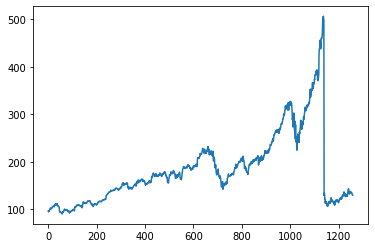

In [71]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [72]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [73]:
import numpy as np

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [75]:
print(df1)

[[0.01573061]
 [0.01046302]
 [0.01385448]
 ...
 [0.09741431]
 [0.09469633]
 [0.09508118]]


In [76]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [77]:
training_size,test_size

(818, 441)

In [78]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [79]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [80]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [81]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [82]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [83]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [84]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 261ms/step - loss: 0.0137 - val_loss: 0.0570
Epoch 2/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0027 - val_loss: 0.0239
Epoch 3/100
12/12 [==============================] - 2s 190ms/step - loss: 9.9006e-04 - val_loss: 0.0195
Epoch 4/100
12/12 [==============================] - 2s 189ms/step - loss: 5.6572e-04 - val_loss: 0.0194
Epoch 5/100
12/12 [==============================] - 2s 209ms/step - loss: 4.2967e-04 - val_loss: 0.0187
Epoch 6/100
12/12 [==============================] - 2s 190ms/step - loss: 3.4361e-04 - val_loss: 0.0182
Epoch 7/100
12/12 [==============================] - 2s 189ms/step - loss: 2.9920e-04 - val_loss: 0.0178
Epoch 8/100
12/12 [==============================] - 2s 190ms/step - loss: 3.4314e-04 - val_loss: 0.0173
Epoch 9/100
12/12 [==============================] - 2s 189ms/step - loss: 3.0507e-04 - val_loss: 0.0168
Epoch 10/100
12/12 [==============================] - 2s 188ms/

In [100]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [101]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [89]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

164.35046807115702

In [90]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

263.42964282118186

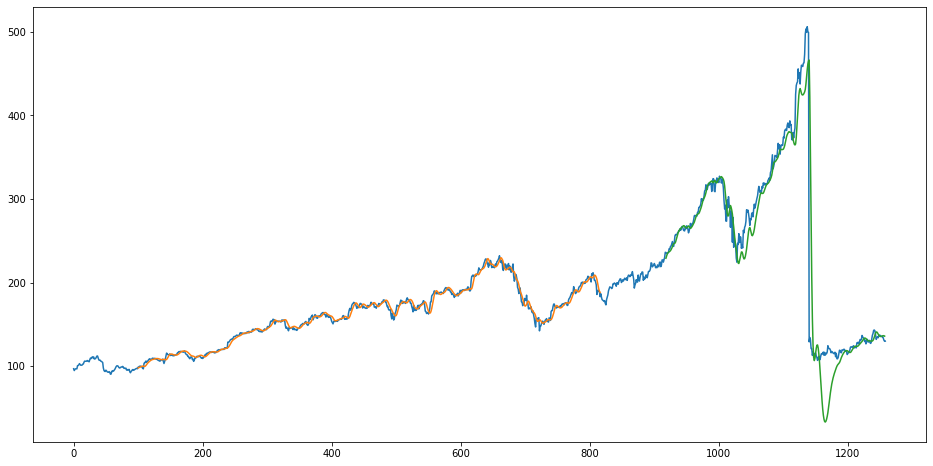

In [91]:
### Plotting 
# shift train predictions for plotting
plt.figure(figsize=(16, 8))
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [92]:
len(test_data)

441

In [93]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [94]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [95]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10503604]
101
1 day input [0.05712568 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876
 0.05950692 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325
 0.07304871 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846
 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419 0.044546
 0.04432952 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948
 0.06164762 0.07011425 0.06944077 0.06956103 0.07206254 0.06987372
 0.06660253 0.06806975 0.06494287 0.05654841 0.05972339 0.06179194
 0.06313891 0.06905592 0.07788334 0.07874925 0.07841251 0.07675286
 0.08036079 0.08187613 0.07562237 0.0791341  0.0771377  0.07562237
 0.09029465 0.09012628 0.09226699 0.08734817 0.0911365  0.09991581
 0.09770295 0.10013229 0.11148527 0.10710764 0.10434155 0.1018641
 0.09397474 0.09782321 0.08721587 0.09760673 0.10032471 0.09294047
 0.09250752 0.09753458 0.0927721  0.08851473 0.09017438 0.10027661
 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168 0.11244738
 0.10010824 0.10535177 0.10739627 0.

In [96]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [97]:
import matplotlib.pyplot as plt

In [98]:
len(df1)

1259

In [119]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [115]:
df1[1159:].shape

(100, 1)

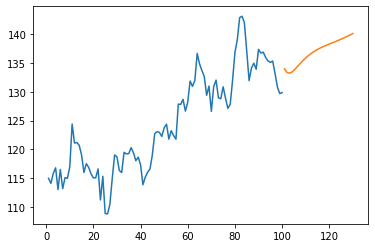

In [116]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

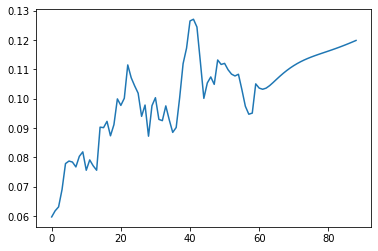

In [120]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [104]:
df3=scaler.inverse_transform(df3).tolist()

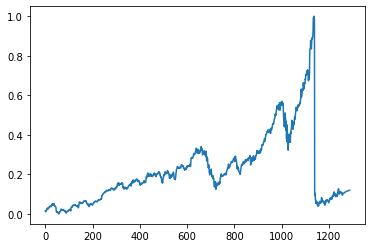

In [121]:
plt.plot(df3)